HDB Resale Transaction bot - by M. W. Ho (c) 2022


In [1]:
!pip install python-telegram-bot
!pip install tabulate
import pandas as pd
import requests
import telegram

from tabulate import tabulate
from pandas.plotting import table 

bot = telegram.Bot(token='5218309496:AAGyUpbqb4rNlLOW3YDyZYkHVJ9a8wzRyNc')
print("\n",bot.get_me(),"\n")

from telegram.ext import Updater
updater = Updater(token='5218309496:AAGyUpbqb4rNlLOW3YDyZYkHVJ9a8wzRyNc', use_context=True)
dispatcher = updater.dispatcher

import logging
logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', level=logging.INFO)


 {'can_join_groups': True, 'id': 5218309496, 'username': 'HDBResaleTx_bot', 'can_read_all_group_messages': False, 'is_bot': True, 'first_name': 'HDBResaleTx', 'supports_inline_queries': False} 



In [2]:
###
from telegram import Update
from telegram.ext import CallbackContext

def start(update: Update, context: CallbackContext):
    context.bot.send_message(chat_id=update.effective_chat.id, text="HDBRT Bot - Get latest HDB Resale Transactions.\nType / for commands.")

def last10(update: Update, context: CallbackContext):
    q=' '.join(context.args)
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&fields=month,block,street_name,flat_type,flat_model,resale_price,floor_area_sqm,lease_commence_date,storey_range&sort=month%20desc&limit=10&q="+q
    response=requests.get(url)
    dataset=response.json()
    df = pd.json_normalize(dataset['result'], "records")
    df = df.sort_values(by='block').set_index('block').reindex(columns=['street_name','flat_type','flat_model','resale_price','floor_area_sqm','lease_commence_date','storey_range','month'])
    df.rename(columns={'street_name': 'street', 'flat_type': 'type', 'resale_price': 'price', 'lease_commence_date': 'built', 'storey_range': 'floor', 'floor_area_sqm': 'sqm', 'flat_model': 'model', 'month': 'sold'}, inplace=True)
    df.replace(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'New Generation', 'Standard', 'EXECUTIVE', 'Maisonette', 'Simplified', 'Improved'],['2','3','4','5','NG','Std','E','M','S','I'], inplace=True) 
    df['type']=df['type']+df['model']
    df.drop('model', axis=1, inplace=True)
    context.bot.send_message(chat_id=update.effective_chat.id, text=tabulate(df, headers='keys', tablefmt='plain', numalign='left'))
    
def last20(update: Update, context: CallbackContext):
    q=' '.join(context.args)
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&fields=month,block,street_name,flat_type,flat_model,resale_price,floor_area_sqm,lease_commence_date,storey_range&sort=month%20desc&limit=20&q="+q
    response=requests.get(url)
    dataset=response.json()
    df = pd.json_normalize(dataset['result'], "records")
    df = df.sort_values(by='block').set_index('block').reindex(columns=['street_name','flat_type','flat_model','resale_price','floor_area_sqm','lease_commence_date','storey_range','month'])
    df.rename(columns={'street_name': 'street', 'flat_type': 'type', 'resale_price': 'price', 'lease_commence_date': 'built', 'storey_range': 'floor', 'floor_area_sqm': 'sqm', 'flat_model': 'model', 'month': 'sold'}, inplace=True)
    df.replace(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'New Generation', 'Standard', 'EXECUTIVE', 'Maisonette', 'Simplified', 'Improved'],['2','3','4','5','NG','Std','E','M','S','I'], inplace=True) 
    df['type']=df['type']+df['model']
    df.drop('model', axis=1, inplace=True)
    context.bot.send_message(chat_id=update.effective_chat.id, text=tabulate(df, headers='keys', tablefmt='plain', numalign='left'))

def last30(update: Update, context: CallbackContext):
    q=' '.join(context.args)
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&fields=month,block,street_name,flat_type,flat_model,resale_price,floor_area_sqm,lease_commence_date,storey_range&sort=month%20desc&limit=30&q="+q
    response=requests.get(url)
    dataset=response.json()
    df = pd.json_normalize(dataset['result'], "records")
    df = df.sort_values(by='block').set_index('block').reindex(columns=['street_name','flat_type','flat_model','resale_price','floor_area_sqm','lease_commence_date','storey_range','month'])
    df.rename(columns={'street_name': 'street', 'flat_type': 'type', 'resale_price': 'price', 'lease_commence_date': 'built', 'storey_range': 'floor', 'floor_area_sqm': 'sqm', 'flat_model': 'model', 'month': 'sold'}, inplace=True)
    df.replace(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'New Generation', 'Standard', 'EXECUTIVE', 'Maisonette', 'Simplified', 'Improved'],['2','3','4','5','NG','Std','E','M','S','I'], inplace=True) 
    df['type']=df['type']+df['model']
    df.drop('model', axis=1, inplace=True)
    context.bot.send_message(chat_id=update.effective_chat.id, text=tabulate(df, headers='keys', tablefmt='plain', numalign='left'))
    

block    street             type    price    sqm    built    floor     sold
117      ANG MO KIO AVE 4   3NG     340000   74     1978     01 TO 03  2022-04
126      ANG MO KIO AVE 3   3NG     380000   67     1978     07 TO 09  2022-04
128      ANG MO KIO AVE 3   3NG     394888   82     1978     04 TO 06  2022-04
129      ANG MO KIO AVE 3   3NG     350000   73     1979     01 TO 03  2022-04
154      ANG MO KIO AVE 5   3NG     360000   82     1981     01 TO 03  2022-04
348      ANG MO KIO AVE 3   3NG     375000   73     1978     07 TO 09  2022-04
404      ANG MO KIO AVE 10  3NG     400000   82     1979     07 TO 09  2022-04
405      ANG MO KIO AVE 10  3NG     345000   67     1979     10 TO 12  2022-04
418      ANG MO KIO AVE 10  3NG     340000   74     1979     04 TO 06  2022-04
435      ANG MO KIO AVE 10  3NG     335000   67     1979     01 TO 03  2022-04
435      ANG MO KIO AVE 10  3NG     320000   67     1979     01 TO 03  2022-04
473      ANG MO KIO AVE 10  3NG     338000   67     198

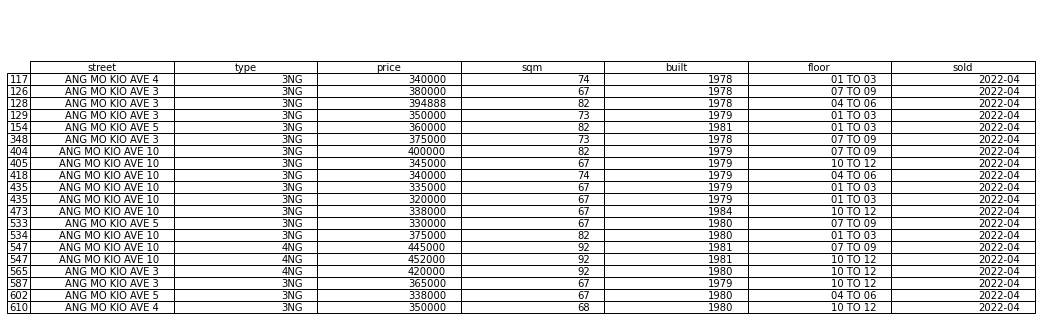

In [9]:
### for testing API and response only
url = "https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3&fields=month,block,street_name,flat_type,flat_model,resale_price,floor_area_sqm,lease_commence_date,storey_range&sort=month%20desc&limit=20&q="
response=requests.get(url)
dataset=response.json()
df = pd.json_normalize(dataset['result'], "records")  
df = df.sort_values(by='block').set_index('block').reindex(columns=['street_name','flat_type','flat_model','resale_price','floor_area_sqm','lease_commence_date','storey_range','month'])
df.rename(columns={'street_name': 'street', 'flat_type': 'type', 'resale_price': 'price', 'lease_commence_date': 'built', 'storey_range': 'floor', 'floor_area_sqm': 'sqm', 'flat_model': 'model', 'month': 'sold'}, inplace=True)
df.replace(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'New Generation', 'Standard', 'EXECUTIVE', 'Maisonette', 'Simplified', 'Improved'],['2','3','4','5','NG','Std','E','M','S','I'], inplace=True) 
df['type']=df['type']+df['model']
df.drop('model', axis=1, inplace=True)
print(tabulate(df, headers='keys', tablefmt='plain', numalign='left'))

### testing return image
import matplotlib.pyplot as plt
ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, df)  # where df is your data frame
plt.rcParams["figure.figsize"] = (18, 1)
plt.savefig('mytable.png')


In [4]:
###
from telegram.ext import CommandHandler

start_handler = CommandHandler('start', start)
dispatcher.add_handler(start_handler)

last10_handler = CommandHandler('last10', last10)
dispatcher.add_handler(last10_handler)

last20_handler = CommandHandler('last20', last20)
dispatcher.add_handler(last20_handler)

last30_handler = CommandHandler('last30', last30)
dispatcher.add_handler(last30_handler)

bot.send_message(text='Launched!', chat_id=1349303768)

#####
updater.start_polling()



2022-04-16 13:54:24,910 - apscheduler.scheduler - INFO - Scheduler started
